In this tutorial, we cover the `pyphs.Simulation` object for the numerical simulation of `pyphs.Core` objects. The core object from the previous tutorial on [`pyphs.Core`](https://afalaize.github.io/pyphs/posts/pyphs-core/) is used as an example.

<!-- TEASER_END -->

The corresponding Python script `pyphs-simulation.py` can be found in the tutorials at `\pyphs\tutorials\`

In [1]:
# Plot appears in the notebook
%matplotlib inline

In [2]:
# Support for Python 2.x and Python 3.x
from __future__ import division

# Disable warnings 
import warnings; 
warnings.simplefilter('ignore')

# import of external packages
import numpy                     # numerical tools
import matplotlib.pyplot as plt  # plot tools

In [3]:
from pyphs.tutorials.core import core 
from pyphs import Simulation

Remove Inverse of Parameters...


In [4]:
# Define the simulation parameters
config = {'fs': 48e3,               # Sample rate (Hz)
          'grad': 'discret',    # gradient evaluation in {'discret', 'theta', 'trapez'}
          'theta': 0.,             # theta for evaluation of the structure
          'split': True,            # Split and presolve the explicit equations
          'maxit': 100,              # Max number of iterations for NL solvers
          'eps': 1e-11,          # Global numerical tolerance
          'path': None,             # Path to saved results. If None, /data/ is created.
          'pbar': False,     # Display a progress bar
          'timer': False            # Display minimal timing infos
          }

# Instantiate a pyphs.Simulation object associated with a given core PHS

simu = core.to_simulation(config = config)

Build method my_core...
    Init Method...
    Split Linear/Nonlinear...
    Build numerical structure...
    Split Implicit/Resolved...
    Re-Build numerical structure...
    Init update actions...
    Init arguments...
        Build x
        Build dx
        Build w
        Build u
        Build p
        Build vl
        Build o
    Init functions...
        Build z
        Build ud_o
        Build dxH
        Build jactempFll
        Build Gl
        Build y
Build numeric my_core...
    Build numerical evaluation of x
    Build numerical evaluation of ud_x
    Build numerical evaluation of o
    Build numerical evaluation of ud_o
    Build numerical evaluation of jactempFll
    Build numerical evaluation of ijactempFll
    Build numerical evaluation of Gl
    Build numerical evaluation of vl
    Build numerical evaluation of ud_vl
    Build numerical evaluation of dxH
    Build numerical evaluation of z
    Build numerical evaluation of y
    Build numerical evaluation of dx
    

In [5]:
# def simulation time
tmax = 0.005
nmax = int(tmax*simu.config['fs'])
t = [n/simu.config['fs'] for n in range(nmax)]


# def input signal
def sig(t, mode='sin'):
    F = 1000.
    A = 50.
    if mode == 'sin':
        out = A*numpy.sin(2*numpy.pi*F*t)
    elif mode == 'impact':
        dur = 0.5*1e-3
        start = 0.001
        out = A if start <= t < start + dur else 0.
    elif mode == 'none':
        out = 0.
    return numpy.array([out])


# def generator for sequence of inputs to feed in the PHSSimulation object
def sequ(mode='sin'):
    for tn in t:
        yield sig(tn, mode)

In [6]:
# Initialize the simulation
simu.init(u=sequ(), nt=len(t))

# Proceed
simu.process()

Simulation: Process...
Simulation: Done


In [7]:
simu.data.method.x

[xL, xK, xM]

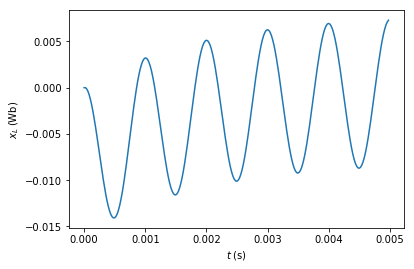

In [8]:
# The simulation results are stored in the simu.data object
t = simu.data.t()       # a generator of time value at each time step
x = simu.data['x']       # a generator of value for vector x at each time step
x1 = simu.data['x', :, 0]    # a generator of value for scalar x component 1

plt.figure()
plt.plot(t, x1)
plt.xlabel('$t \; \mathrm{(s)}$')
plt.ylabel('$x_L \; \mathrm{(Wb)}$')

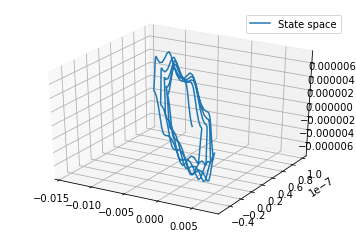

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], label='State space')
ax.legend()

### plt.figure()

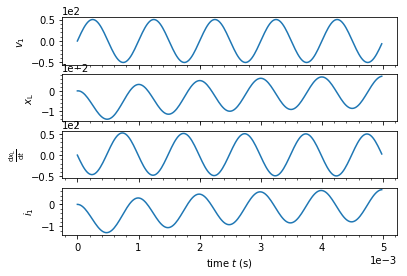

In [10]:
fig, axes = simu.data.plot([('u', 0), ('x', 0), ('dtx', 0), ('y', 0)])

Build numerical evaluations...
Build numerical evaluations...
Build numerical evaluations...
Build numerical evaluations...


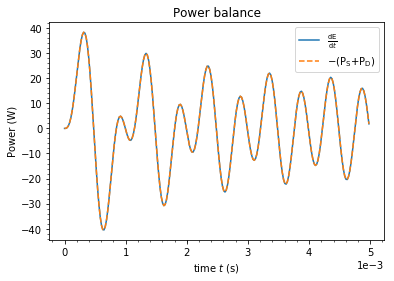

In [11]:
fig, ax = simu.data.plot_powerbal(mode='single')